## Actividad: Regresion lineal 
Para esta tarea utilizo un dataset sacado de kaggle para predecir las notas de tres materias al mismo tiempo. lo elegi porque es amplio el dataset la cual calza justo de 1000 filas, ademas tambien para ver en que puede afectar el rendimiento academico de los alumnos como se ven en algunas variable como el nivel educativo de los padres, preparacion previa, el estado civil de los padres, si los alumnos se alimentan regularmente, etc.

# Se importan las librerias necesarias 


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# el dataset se convierte en dataframe y se elimina la columna del indice automatico que es innecesario


In [36]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Para ver la info y el tipo de dato 


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


# Esto para indentificar cuantos datos nulos hay


In [38]:
df.isnull().sum()


Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# limpieza de los datos nulos


In [39]:
df[['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours' ]] = df[['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours' ]].fillna(0)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,0,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,0,married,sometimes,yes,0.0,0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,0,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Se verifica de nuevo para determinar que no haya datos nulos y asi poder usarlo para el modelo


In [40]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [41]:
# Vamos a separar variables predictorias y variables objetivo
X = df.drop(columns=["MathScore", "ReadingScore", "WritingScore"]) # predictorias
y = df[["MathScore", "ReadingScore", "WritingScore"]] # objetivo

# Codificar variables categóricas que tienen texto a binario 
X = pd.get_dummies(X)

# Vamos a separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Se crear y se entrena el modelo 
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción para un nuevo caso
pred = modelo.predict([X_test.iloc[0]])

# Mostrar la predicción
print("🎯 Predicción para alumno 1:")
print(f"  MathScore     : {pred[0][0]:.2f}")
print(f"  ReadingScore  : {pred[0][1]:.2f}")
print(f"  WritingScore  : {pred[0][2]:.2f}")

# Esto Muestra la intersección (bias) para las 3 materias
print(f"\n📈 Intersección del modelo: {modelo.intercept_}")

🎯 Predicción para alumno 1:
  MathScore     : 63.18
  ReadingScore  : 73.06
  WritingScore  : 74.32

📈 Intersección del modelo: [65.9169326  69.38202976 68.47598523]


c:\Users\Tomas\Desktop\tlp3_regresion_lineal\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Lo visualizamos con graficos usando matplotlib para que compare los datos de entrenamiento con los datos ya predecidos anteriormente

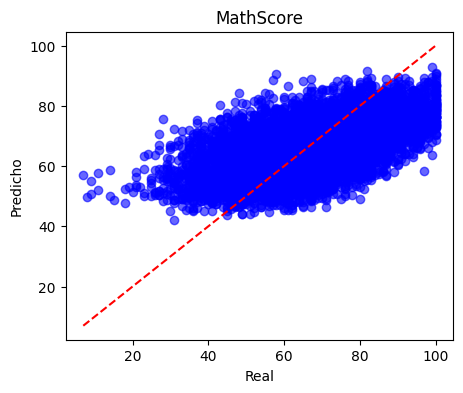

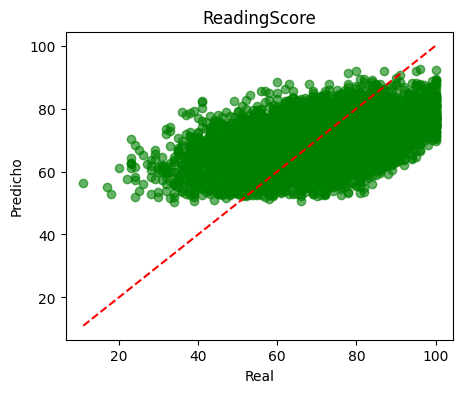

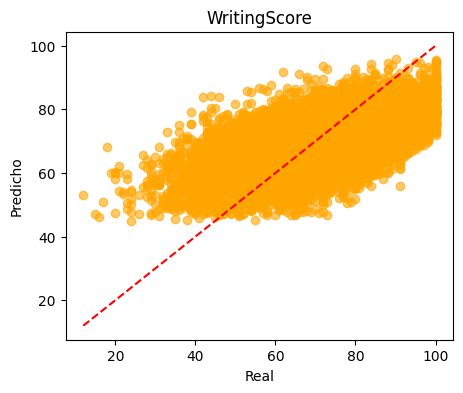

In [42]:
# Predecimos todas las notas del conjunto de prueba
y_pred = modelo.predict(X_test)

# Creamos listas separadas para cada materia
real_math = y_test["MathScore"]
pred_math = y_pred[:, 0]

real_reading = y_test["ReadingScore"]
pred_reading = y_pred[:, 1]

real_writing = y_test["WritingScore"]
pred_writing = y_pred[:, 2]

# Gráfico 1: MathScore
plt.figure(figsize=(5, 4))
plt.scatter(real_math, pred_math, color='blue', alpha=0.6)
plt.plot([real_math.min(), real_math.max()], [real_math.min(), real_math.max()], 'r--')
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.title("MathScore")
plt.show()

# Gráfico 2: ReadingScore
plt.figure(figsize=(5, 4))
plt.scatter(real_reading, pred_reading, color='green', alpha=0.6)
plt.plot([real_reading.min(), real_reading.max()], [real_reading.min(), real_reading.max()], 'r--')
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.title("ReadingScore")
plt.show()

# Gráfico 3: WritingScore
plt.figure(figsize=(5, 4))
plt.scatter(real_writing, pred_writing, color='orange', alpha=0.6)
plt.plot([real_writing.min(), real_writing.max()], [real_writing.min(), real_writing.max()], 'r--')
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.title("WritingScore")
plt.show()